<a href="https://colab.research.google.com/github/davidesqalv/genetic-algorithm-16th-order-control-transfer-function-stability/blob/main/genetic_algorithm_16th_order_transfer_function_stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Config

In [ ]:
!pip install control

In [ ]:
!pip install pygad

In [ ]:
from sympy.abc import s,t,x,y,z
import numpy as np
import matplotlib.pyplot as plt

import control as co
import pygad
import warnings
warnings.filterwarnings('ignore')

from queue import Queue
from itertools import groupby

#Control System Transfer Function, Pole Stability test function


In [ ]:
A1, A2, A3 = 1, 1, 1
B1, B2, B3 = 1, 1, 1
C1, C2, C3 = 1, 1, 1
D2 = 1
K1, K2, K3 = 1, 1, 1
F1, F2 = 1, 1

def f_tranferencia(parametros_f):

  [A1, A2, A3, B1, B2, B3, C1, C2, C3, D2, K1, K2, K3, F1, F2] = parametros_f  #chromosome definition

  #definicion de funciones de trasferencia
  G1 = co.tf([A1], [B1, C1*B1, 0])

  G2 = co.tf([A2, 0], [B2, 0, (B2*C2 + D2)])

  G3 = co.tf([A3, A3*C3, 0],[B3])

  H1 = co.tf([K1*F1, K1],[1])

  H2 = co.tf([K2*F2, K2, 0], [1])

  H3 = co.tf([K3, 0],[1])

  F = (G1*G3*(G2+H1))/(1+G1*G3*(G2+H1)+G2*H2+G3*H3*(G2+H1))

  return F

def estabilidad_sistema(f_t):
  polos = co.pole(f_t) #polos de la funcion de transferencia

  estable = True 

  for p in polos: #iteracion en la lista de polos
    if p.real > 0: 
      estable = False #si se encuentran algun polo en el semiplano positivo, no es estable

  return estable

def num_polos(f_t):
  polos = co.pole(f_t) #lista de polos

  n_polos = 0

  for p in polos:
    if p.real > 0: #iteracion y conteo de polos en el semiplano derecho
      n_polos += 1

  return n_polos

def salida_sistema(f_t):
  t = np.linspace(0, 50, 500) #se crea un arreglo de 50 segundos, 500 muestras o 10 muestras por segundo
  t1, y1 = co.step_response(f_t, t) #respuesta al sistema ante escalon unitario

  return y1

0.13064904831240615
0.7644980748135819


False

##Transfer Function with all parameters = 1

In [ ]:
F = f_tranferencia([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])


respuesta = salida_sistema(F)


print(respuesta[10])
print(respuesta[20])

estabilidad_sistema(F)

In [ ]:
F

TransferFunction(array([  1.,   3.,  12.,  27.,  55.,  92., 122., 144., 132.,  96.,  56.,
        16.,   0.,   0.]), array([  1.,   4.,  15.,  41.,  89., 170., 269., 367., 442., 442., 388.,
       292., 168.,  88.,  32.,   0.,   0.]))

###iterating over poles to test stability

In [ ]:
polos = co.pole(F)

for p in polos:
  print(p.real)

print(polos.real)

print(co.dcgain(F))

-1.291627548668381
-1.291627548668381
0.04204289402899852
0.04204289402899852
-1.000000139093417
-0.9999998609066663
1.0697944294535411e-05
1.0697944294535411e-05
-2.3339016916428586e-05
-2.3339016916428586e-05
1.2641072750063653e-05
1.2641072750063653e-05
0.24958465463929766
0.24958465463929766
0.0
0.0
[-1.29162755e+00 -1.29162755e+00  4.20428940e-02  4.20428940e-02
 -1.00000014e+00 -9.99999861e-01  1.06979443e-05  1.06979443e-05
 -2.33390169e-05 -2.33390169e-05  1.26410728e-05  1.26410728e-05
  2.49584655e-01  2.49584655e-01  0.00000000e+00  0.00000000e+00]
nan


#Genetic algorithm

Streaming output truncated to the last 5000 lines.
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Fitness    = 99.99595331836474
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
na

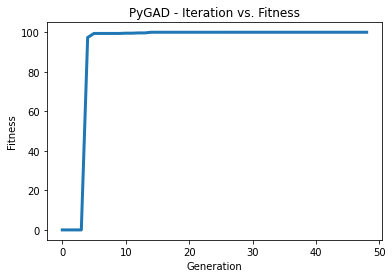

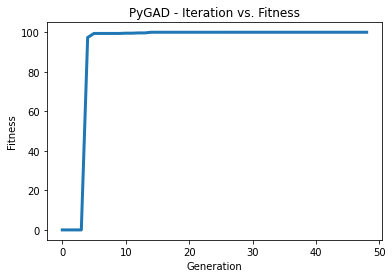

In [ ]:

def fitness_func(solution, solution_idx):
    # Fitness function
    try:
      nueva_funcion = f_tranferencia(solution) #declaration of transfer function with new chromosome

      estable = estabilidad_sistema(nueva_funcion) #Stability check according to the number of poles in the right half plane

      respuesta = salida_sistema(nueva_funcion) #system output for unit step

      constante_estabilidad = 1.0 #constant that is modified according to stability
      output = 0.0  #constant corresponding 1 second output

      if estable == False: #if not stable:
        n_polos = num_polos(nueva_funcion) #calculate number of poles in right half plane
        constante_estabilidad = 1/(n_polos*1000) #modify constant inversely proportional to number of poles
        output = 0.1 #make the supposed output to 1 sec a very small value
      else: #if it is stable
        constante_estabilidad = 1 #leave the constant at its initial value
        output = respuesta[10] #output the value of the function to 1 second

      #quality function assigns score according to how close the value in 1 second is to 1.2
      #that is, 20% more than 1 (expected output for being a closed-loop system), and multiply
      #by value inversely proportional to the number of poles in the right half plane
      fitness = (100 - (np.abs(1.2 - output)/1.2)*100)*constante_estabilidad

    except: #If theres an error in calculating the transfer function, by division by 0 usually
      fitness = 0.00001 #returns low fitness

    return fitness



fitness_function = fitness_func


sol_per_pop = 200 #initial population: number of chromosomes
num_genes = 15 #number of genes (the 15 constants of the function)

init_range_low = 1 #lower limit of allele range
init_range_high = 10 #upper limit of allele range

num_generations = 400 #number of generations
num_parents_mating = int(sol_per_pop*0.3) #number of crossover parents = 30% of chromosome number

parent_selection_type = "rws" #Parent select type: rws stands for roulette

keep_parents = int(sol_per_pop*0.25) #number of parents remaining per generation = 25% of chromosome number

crossover_type = "two_points" # Crossing type: the ones used were scattered and two_points

# Mutation type parameters
mutation_type = "random" # random type mutation
mutation_percent_genes = 30 # Mutation Probability Percentage

fitness_queue = Queue(maxsize = 20) #Queue in which the last 20 results are stored to call stop

def all_equal(iterable): #function that evaluates if all the numbers in the queue are equal
    g = groupby(iterable)
    return next(g, True) and not next(g, False)

last_fitness = 0
def callback_generation(ga_instance): #function that is called every time a generation is completed
    global last_fitness
    #generation data printing, including the best result
    print("Generation = {generation}".format(generation=ga_instance.generations_completed)) #generation
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1])) #best fitness of the generation
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness)) #difference between current and previous fitness
    last_fitness = ga_instance.best_solution()[1]

    if fitness_queue.full(): #check the queue to find out if the stop condition is met
      fitness_queue.get()
      fitness_queue.put(last_fitness)
    
      lista = list(fitness_queue.queue)
      if all_equal(lista): #check that all results in the list are equal
        print('Las ultimas 10 soluciones son iguales, parando generacion...')
        return 'stop' #signal for the genetic algorithm to stop

    else: #if the queue is not yet full
      fitness_queue.put(last_fitness) #fill the queue with the last result
  

# Genetic algorithm instance, inserting all declared parameters
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       on_generation=callback_generation,
                       gene_type=int)

# Call to run the genetic algorithm
ga_instance.run()

# Printing of results 
ga_instance.plot_result()

##Solution evaluation

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Parameters of the best solution : [8 5 7 8 0 2 6 8 4 4 7 5 0 6 1]
Fitness value of the best solution = 99.99595331836474
nan


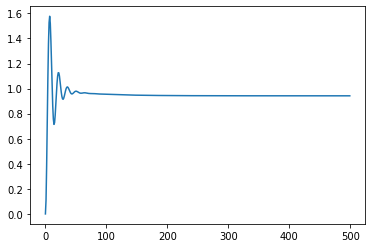

In [ ]:
#Printing of results
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parámetros de la mejor solución: {solution}"))
print(f"Calidad de la mejor solución = {solution_fitness}")

#printout of the response of the transfer function with the best solution
funcion = f_tranferencia(solution)
estable = estabilidad_sistema(funcion)
plt.show()
plt.plot(salida_sistema(funcion))

1.2000485601796231
7
1.5772374646838863


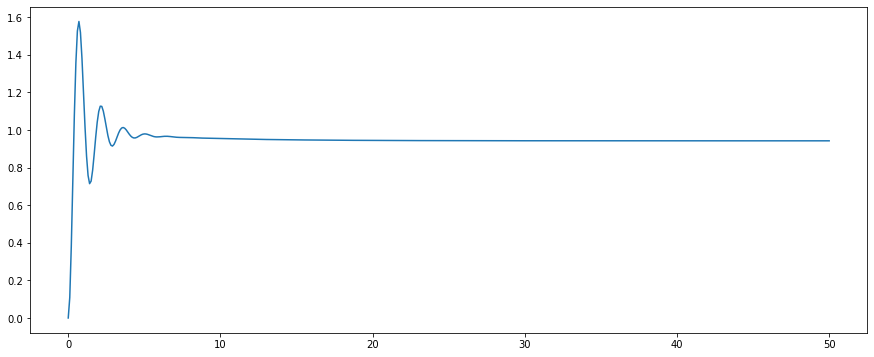

In [ ]:
plt.figure(figsize=(15, 6))
t = np.linspace(0, 50, 500)
plt.plot(t, salida_sistema(funcion))
print(salida_sistema(funcion)[10])
print(np.argmax((salida_sistema(funcion))))
print(salida_sistema(funcion)[7])